# Imports 

In [6]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from scipy.stats import zscore, stats
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    StandardScaler
)
from sklearn.feature_selection import (
    VarianceThreshold,
    SelectKBest,
    f_regression,
    SequentialFeatureSelector,
    RFE,
    SelectFromModel
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
import mlflow
import mlflow.sklearn
import joblib



# Upload the data

This is the link of the dataset: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset . 

In [7]:
df= pd.read_csv('HOusing.csv')

In [8]:
pd.options.display.max_columns = None
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Data Analysis, cleaning, and preprocessing 

## understand and view for the data

First I want to see the shape of the data and the columns details(data types, columns names), and I want to check if there any null values or duplicates values. 

In [9]:
print('datset shape: ',df.shape)
print("--------------------------------------------------------")

print("dataset columns: ",df.columns)
print("--------------------------------------------------------")

print('dataset info:  ',df.info())
print("--------------------------------------------------------")

print('null values: ',df.isnull().sum())
print("--------------------------------------------------------")

print("duplicates: ",df.duplicated().sum())

datset shape:  (21613, 21)
--------------------------------------------------------
dataset columns:  Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  floa

Now i want to use describe to analyse important details about data like the mean of the columns and avg to see if there any need to normalization in some columns or scaling , also i can check if there any possible outliers .

In [10]:
print("descibtion: ",df.describe())
print("--------------------------------------------------------")

descibtion:                   id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580306e+09  5.400886e+05      3.370795      2.114757   2079.899736   
std    2.876570e+09  3.671268e+05      0.930105      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989     

After I analyze the results I found :


1) column that might need normalization:

I found them by search for columns that have a very large range and the feature with very different scales

- The columns :
| `price`         |
| `sqft_living`   |
| `sqft_lot`      |
| `sqft_basement` |
| `sqft_above`    |
| `sqft_living15` |
| `sqft_lot15`    |

2) columns that might need containing Outliers:

I found them by search where max is much larger than the 75th percentile and The min is much smaller than the 25th percentile

- The columns : 
| `price`         |
| `sqft_living`   |
| `sqft_lot`      |
| `sqft_basement` |
| `sqft_above`    |
| `sqft_lot15`    |


## cleaning and preprocessing

First I want to make a copy for the data so I can change anything in it for the model

In [11]:
df_model_version = df.copy()

I will delete the identification columns 

In [12]:
df_model_version.drop(columns=['id'], inplace=True)

There is a date column so I will change it to datatime datatype

In [13]:
df_model_version['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Price column

Now I want to deal with the price column that have outlieres and normalization issues that might effect the model performanc so First I will make sure that there is outliers in this columns.

<Axes: ylabel='price'>

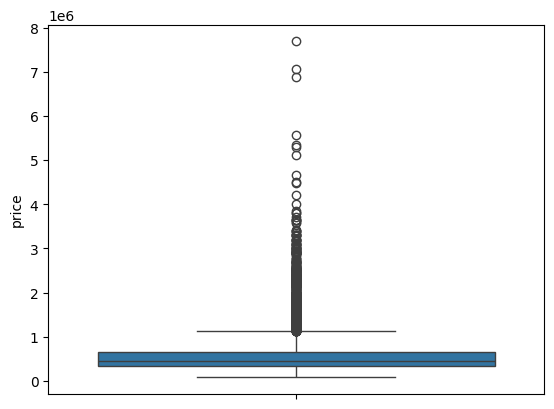

In [14]:
sns.boxplot(data=df['price'])

The boxplot show that there is alot of outliers in the price column and that will effect on my model results so I will deal with it using somthing call log transformation.

Text(0.5, 1.0, 'Original Price Distribution')

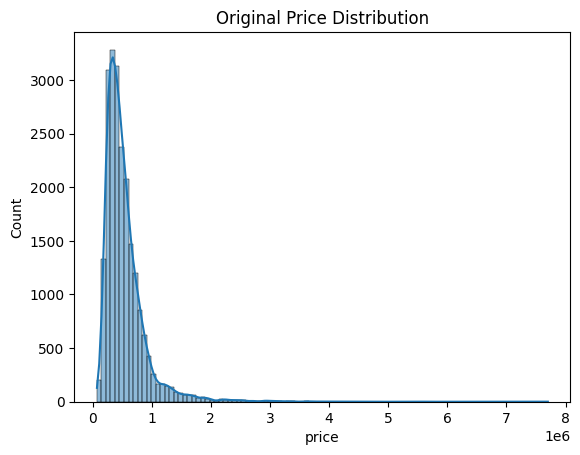

In [15]:

sns.histplot(df['price'], bins=100, kde=True)
plt.title("Original Price Distribution")


In [16]:
df['price'].skew()

4.024080394890599

In [17]:
df_model_version['price'] = np.log1p(df['price'])  

Text(0.5, 1.0, 'Price Distribution after Log Transformation')

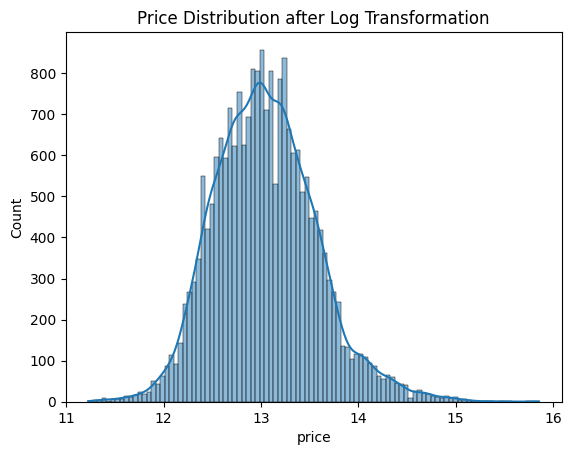

In [18]:
sns.histplot(df_model_version['price'], bins=100, kde=True)
plt.title("Price Distribution after Log Transformation")


In [19]:
df_model_version['price'].skew()

0.428092230636074

<Axes: ylabel='price'>

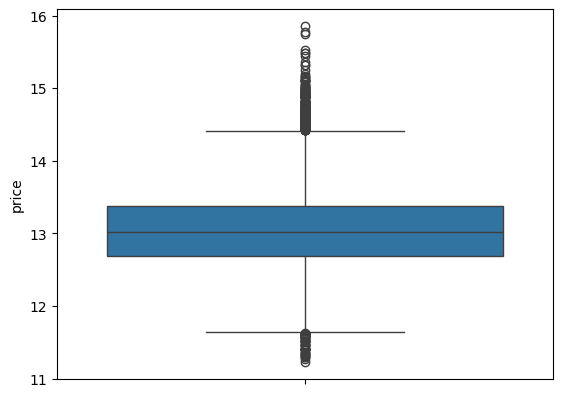

In [20]:
sns.boxplot(data=df_model_version['price'])

What did i do :
- I applied a log transformation to the 'price' column to handle its strong right skew 
- and reduce the impact of extreme high values. 
- This improves model performance, especially for linear regression.
- by making the target distribution more normally distributed.
- I used np.log1p(price) instead of np.log(price) to safely handle any zero values.



### Dealing with other suspected columns

#### Outliers

First i will put them in list to deal with them easly

In [21]:
suspected_cols = [
    'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15'
]


Now I will go through them using for loop and by using the IQR method i will see the outliers of each column

In [22]:
for col in suspected_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # To know the numbers of outliers I will use Boolean mask where True means the value is an outlier; sum() counts how many outliers there are
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    total = df[col].count()
    percent = 100 * outliers / total

    print(f"{col}: {outliers} outliers ({percent:.2f}%)")


sqft_living: 572 outliers (2.65%)
sqft_lot: 2425 outliers (11.22%)
sqft_above: 611 outliers (2.83%)
sqft_basement: 496 outliers (2.29%)
sqft_living15: 544 outliers (2.52%)
sqft_lot15: 2194 outliers (10.15%)


I will deal with outleirs using clip that limits the values in a column to be within a specified range.
- Any value below the lower bound is replaced with the lower bound.
- Any value above the upper bound is replaced with the upper bound.

In [23]:
for col in suspected_cols:
    Q1 = df_model_version[col].quantile(0.25)
    Q3 = df_model_version[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_model_version[col] = df_model_version[col].clip(lower=lower, upper=upper)

    outliers = ((df_model_version[col] < lower) | (df_model_version[col] > upper)).sum()
    total = df_model_version[col].count()
    percent = 100 * outliers / total

    print(f"{col}: {outliers} outliers ({percent:.2f}%)")



sqft_living: 0 outliers (0.00%)
sqft_lot: 0 outliers (0.00%)
sqft_above: 0 outliers (0.00%)
sqft_basement: 0 outliers (0.00%)
sqft_living15: 0 outliers (0.00%)
sqft_lot15: 0 outliers (0.00%)


#### Noramlization

First check which col realy need normalization 

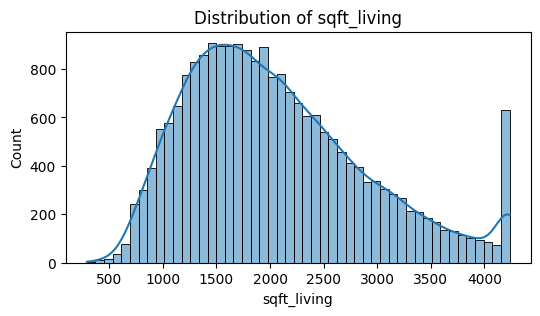

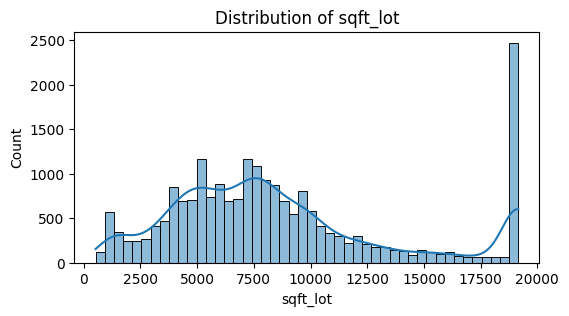

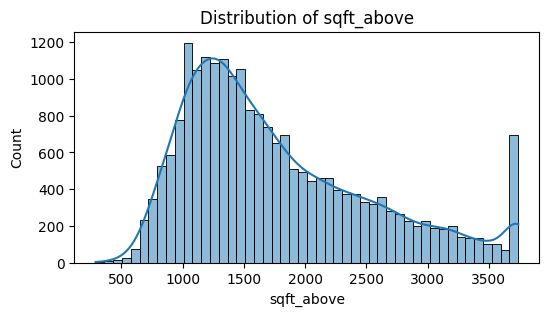

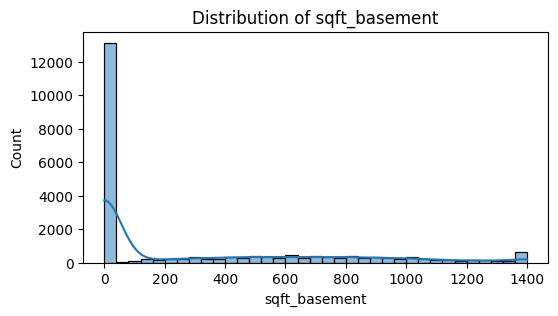

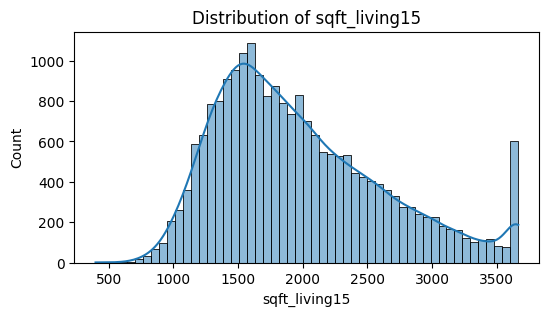

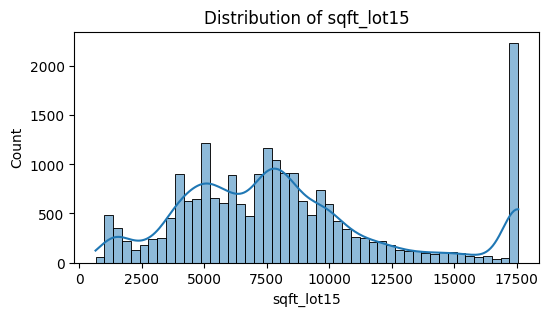

In [24]:
for col in suspected_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_model_version[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


After i see the results i figured that thre is no need for normalization for these cols some of them is already normalize and the unnormalize ones have really bad distreburion normalize will not work with them.

# Feature Selection

**Split the data** 

In [25]:
X=df_model_version.drop(['price', 'date'],axis=1)
y=df_model_version['price']

**For feature selection I will use RFE**

In [26]:
model = LinearRegression()

rfecv = RFECV(estimator=model,  scoring='r2') 
rfecv.fit(X, y)

print("Optimal number of features:", rfecv.n_features_)
selected = X.columns[rfecv.support_]
print("Selected features:", list(selected))

Optimal number of features: 17
Selected features: ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


I used RFECV function that give me the most important features and the number of features that give me best performance let me explain what RFECV do:
- Perform Recursive Feature Elimination with Cross-Validation (RFECV)
- This process repeatedly fits a linear regression model while eliminating 
- the least important feature(s) at each step, based on model coefficients.
- Cross-validation is used to evaluate the performance at each stage, helping to identify the optimal number of features that gives the best R² score.



In [27]:
df.to_csv('df_model_version.csv', index=False)


# Model Training 


For my data I will use Linear regression as a model because all my features is intergers wich is the best for regression and my data have a lot of linear realtionships.

**Split the data to x-train and y-train**

In [28]:

X=df_model_version[selected]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create the model and fit it**

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Make predict and evaluate the model performance**

In [30]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error: 0.06379529863374564
Root Mean Squared Error (RMSE): 0.25257731219122914
R² Score: 0.7761810224871603


**Visual the results**

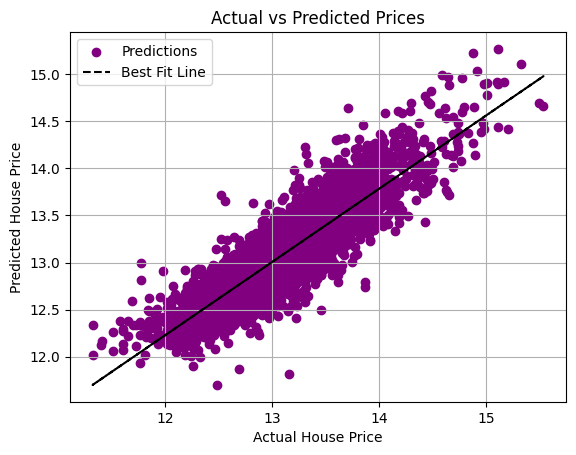

In [31]:
plt.scatter(y_test, y_pred, color='purple', label='Predictions')

m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='black', linestyle='--', label='Best Fit Line')

plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

**I want to make prediction on the real values before the transformation and see the performance**

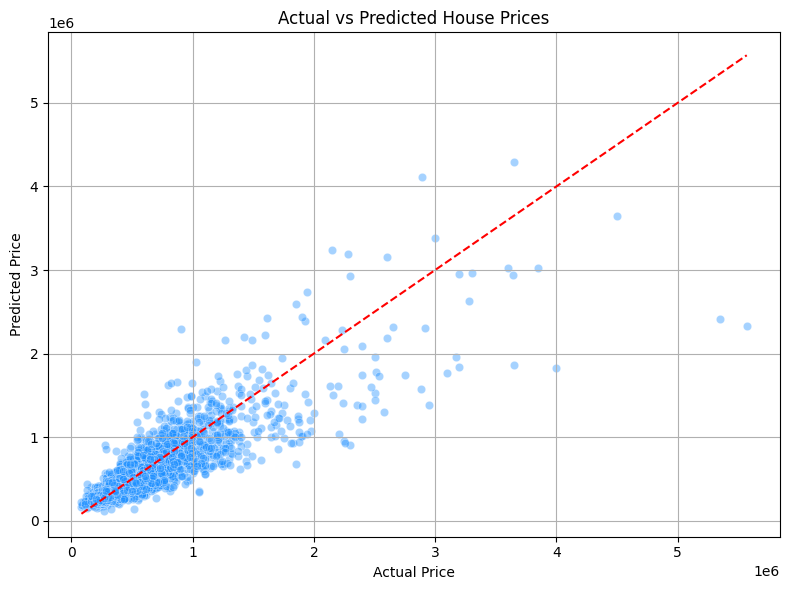

R² Score: 0.7384
MAE: 112642.76
RMSE: 198858.85


In [32]:
log_price_pred = model.predict(X_test)
price_pred = np.expm1(log_price_pred)        # Predicted real price before transformation
price_actual = np.expm1(y_test)              # Actual real price before transformation

plt.figure(figsize=(8, 6))
sns.scatterplot(x=price_actual, y=price_pred, alpha=0.4, color='dodgerblue')
plt.plot([price_actual.min(), price_actual.max()],
         [price_actual.min(), price_actual.max()],
         color='red', linestyle='--')  # I will make a regression line start from the minimum to the maximum of actual prices
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

r2 = r2_score(price_actual, price_pred)
mae = mean_absolute_error(price_actual, price_pred)
rmse = np.sqrt(mean_squared_error(price_actual, price_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# MLFLow


In [33]:
with mlflow.start_run() as run:
    mlflow.log_param("model_type", "Linear Regression")
    mlflow.log_param("features", list(selected))
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    run_id = mlflow.active_run().info.run_id
    mlflow.sklearn.log_model(model, "model")    

joblib.dump(model, "muard_model.pkl")
mlflow.log_artifact("muard_model.pkl")

print(f"Model saved in run {run_id}")


2025/06/17 01:17:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model saved in run e200cc9a555e4f74be5c78dc8de69748


In [34]:
mlflow.end_run()